### Import Libraries

In [52]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding

### Upload the file

In [ ]:
uploaded = files.upload()

In [8]:
crabs = pd.read_csv('10 - crabs.csv')
pd.set_option('display.max_rows', None)
crabs.head(10)

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
5,B,M,6,10.8,9.0,23.0,26.5,9.8
6,B,M,7,11.1,9.9,23.8,27.1,9.8
7,B,M,8,11.6,9.1,24.5,28.4,10.4
8,B,M,9,11.8,9.6,24.2,27.8,9.7
9,B,M,10,11.8,10.5,25.2,29.3,10.3


In [9]:
 crabs = crabs.rename(columns={'sp':'species','FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapage Midline', 'CW':'Maximum Width', 'BD':'Body Depth'})
 crabs.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
5,B,M,6,10.8,9.0,23.0,26.5,9.8
6,B,M,7,11.1,9.9,23.8,27.1,9.8
7,B,M,8,11.6,9.1,24.5,28.4,10.4
8,B,M,9,11.8,9.6,24.2,27.8,9.7
9,B,M,10,11.8,10.5,25.2,29.3,10.3


In [10]:
crabs['species'] = crabs['species'].map({'B':'Blue', 'O' : 'Orange'})
crabs['sex'] = crabs['sex'].map({'M':'Male', 'F':'Female'})

In [11]:
crabs.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2
5,Blue,Male,6,10.8,9.0,23.0,26.5,9.8
6,Blue,Male,7,11.1,9.9,23.8,27.1,9.8
7,Blue,Male,8,11.6,9.1,24.5,28.4,10.4
8,Blue,Male,9,11.8,9.6,24.2,27.8,9.7
9,Blue,Male,10,11.8,10.5,25.2,29.3,10.3


In [13]:
crabs['class'] = crabs.species + crabs.sex
crabs['class'].value_counts()

class
BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: count, dtype: int64

In [15]:
crabs.head(5)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


### Locally Linear Embedding

In [16]:
data_columns = ['Frontal Lobe', 'Rear Width', 'Carapage Midline', 'Maximum Width', 'Body Depth']

This method projects the data into lower dimensional space

This method is based on local distances. When we work with distances it is important that all the variables have the same range.

A variable with large values can confuse the model. So we need a solution

The solution I could think is MinMaxScaler - transform features by scaling each feature to a given range

In [22]:
 crabs_mms = crabs.copy()
 crabs_mms[data_columns] = MinMaxScaler((0,1)).fit_transform(crabs[data_columns])

In [24]:
crabs_mms.tail(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class
190,Orange,Female,41,0.824,0.693,0.751,0.720,0.768,OrangeFemale
191,Orange,Female,42,0.836,0.803,0.769,0.757,0.845,OrangeFemale
192,Orange,Female,43,0.843,0.803,0.815,0.776,0.845,OrangeFemale
193,Orange,Female,44,0.862,0.730,0.766,0.736,0.735,OrangeFemale
194,Orange,Female,45,0.887,0.869,0.884,0.835,0.897,OrangeFemale
195,Orange,Female,46,0.893,0.839,0.805,0.776,0.813,OrangeFemale
196,Orange,Female,47,0.912,0.774,0.821,0.803,0.871,OrangeFemale
197,Orange,Female,48,0.925,0.781,0.848,0.808,0.865,OrangeFemale
198,Orange,Female,49,0.962,0.781,0.860,0.843,0.884,OrangeFemale
199,Orange,Female,50,1.000,1.000,0.957,0.944,0.968,OrangeFemale


## Using LLE

In [44]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=15)
# n_components could be easily known that the dimensions of the LLE
# n_neighbors could be the neighbors to calculate the locality
# the lle returns itself a list
crabs_lle = lle.fit_transform(crabs_mms[data_columns])
print('Reconstruction error :', lle.reconstruction_error_)
crabs_mms[['LLE1','LLE2']] = crabs_lle


Reconstruction error : 2.153028802201499e-06


In [30]:
crabs_mms.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class,LLE1,LLE2
0,Blue,Male,1,0.057,0.015,0.043,0.051,0.058,BlueMale,-0.145,0.061
1,Blue,Male,2,0.101,0.088,0.103,0.099,0.084,BlueMale,-0.133,0.058
2,Blue,Male,3,0.126,0.095,0.131,0.141,0.103,BlueMale,-0.127,0.053
3,Blue,Male,4,0.151,0.102,0.164,0.160,0.135,BlueMale,-0.119,0.028
4,Blue,Male,5,0.164,0.109,0.170,0.157,0.135,BlueMale,-0.117,0.022
5,Blue,Male,6,0.226,0.182,0.252,0.251,0.239,BlueMale,-0.089,0.023
6,Blue,Male,7,0.245,0.248,0.277,0.267,0.239,BlueMale,-0.086,0.027
7,Blue,Male,8,0.277,0.190,0.298,0.301,0.277,BlueMale,-0.075,0.017
8,Blue,Male,9,0.289,0.226,0.289,0.285,0.232,BlueMale,-0.081,0.019
9,Blue,Male,10,0.289,0.292,0.319,0.325,0.271,BlueMale,-0.073,0.038


<Axes: xlabel='LLE1', ylabel='LLE2'>

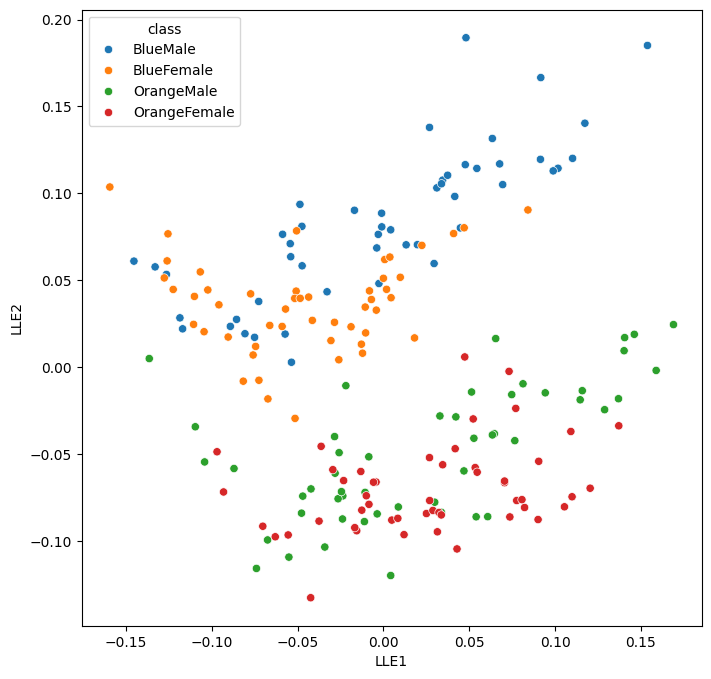

In [45]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='LLE1', y='LLE2', hue='class',data=crabs_mms)

### Now start with 3 dimensions n_components =3

In [46]:
 lle_3d = LocallyLinearEmbedding(n_components=3, n_neighbors=15)
 crabs_lle = lle_3d.fit_transform(crabs_mms[data_columns])
 print('Reconstruction error :', lle_3d.reconstruction_error_)
 crabs_mms[['LLE1', 'LLE2','LLE3']] = crabs_lle

Reconstruction error : 1.5214133598291706e-05


In [47]:
crabs_mms.head(10)

,species,sex,index,Frontal Lobe,Rear Width,Carapage Midline,Maximum Width,Body Depth,class,LLE1,LLE2,LLE3
0,Blue,Male,1,0.057,0.015,0.043,0.051,0.058,BlueMale,-0.145,0.061,0.093
1,Blue,Male,2,0.101,0.088,0.103,0.099,0.084,BlueMale,-0.133,0.058,0.059
2,Blue,Male,3,0.126,0.095,0.131,0.141,0.103,BlueMale,-0.127,0.053,0.053
3,Blue,Male,4,0.151,0.102,0.164,0.160,0.135,BlueMale,-0.119,0.028,0.060
4,Blue,Male,5,0.164,0.109,0.170,0.157,0.135,BlueMale,-0.117,0.022,0.060
5,Blue,Male,6,0.226,0.182,0.252,0.251,0.239,BlueMale,-0.089,0.023,0.046
6,Blue,Male,7,0.245,0.248,0.277,0.267,0.239,BlueMale,-0.086,0.027,0.008
7,Blue,Male,8,0.277,0.190,0.298,0.301,0.277,BlueMale,-0.075,0.017,0.056
8,Blue,Male,9,0.289,0.226,0.289,0.285,0.232,BlueMale,-0.081,0.019,0.028
9,Blue,Male,10,0.289,0.292,0.319,0.325,0.271,BlueMale,-0.073,0.038,-0.009


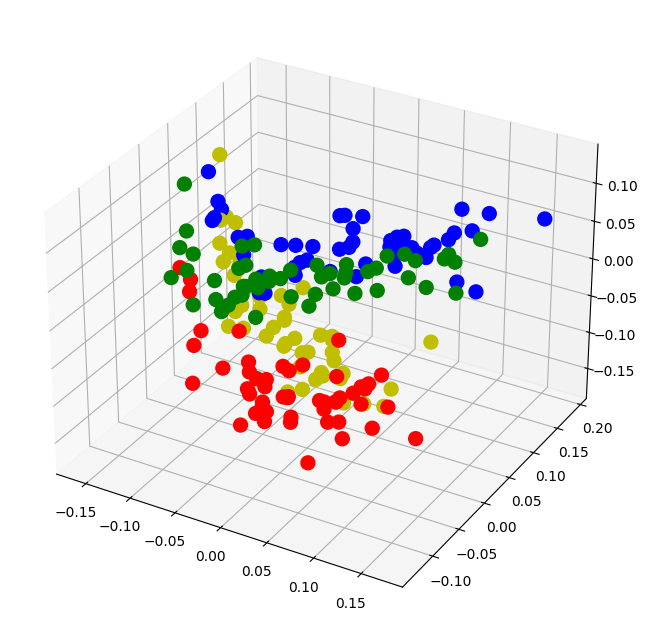

In [51]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d') # the z axis to be one time, one grid return the value output of one

color_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

plt.scatter(crabs_mms.LLE1, crabs_mms.LLE2, zs=crabs_mms.LLE3,
            depthshade=False, c = crabs['class'].apply(lambda x: color_crabs[x]), s =100)

In [53]:
fig = px.scatter_3d(crabs_mms, x='LLE1', y='LLE2', z='LLE3', color = 'class')
fig.show()